In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from mlxtend.plotting import plot_confusion_matrix

In [7]:
diabetes_dataset = pd.read_csv('/content/diabetes_binary_health_indicator.csv') 

In [8]:
diabetes_dataset.keys()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
diabetes_dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


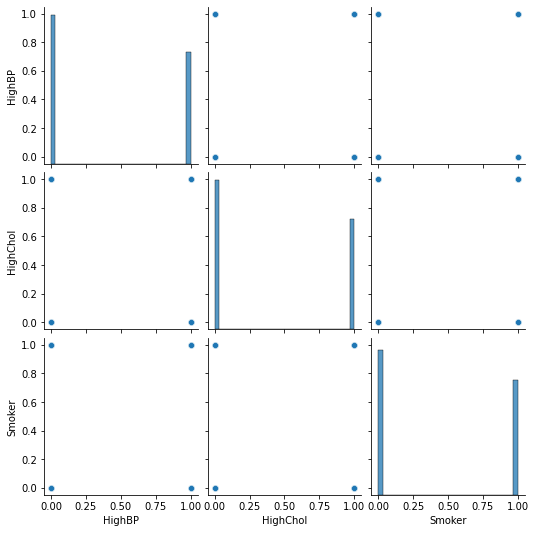

In [10]:
sns.pairplot(diabetes_dataset[['HighBP', 'HighChol', 'Smoker']])

In [11]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(diabetes_dataset,names='Diabetes_binary',title='Proportion of non diabetic and diabetic people',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [12]:
fig = px.pie(diabetes_dataset,names='HighChol',title='High chol')
fig.show()

In [13]:
diabetes_dataset.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


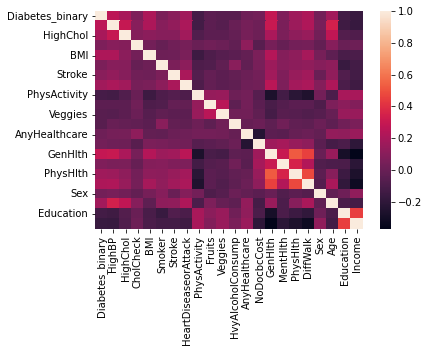

In [14]:
sns.heatmap(diabetes_dataset.corr())

In [15]:
diabetes_dataset.shape

(253680, 22)

In [16]:
print(diabetes_dataset.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [17]:
duplicate = diabetes_dataset[diabetes_dataset.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [18]:
# Removing duplicate rows from the dataset
diabetes_dataset.drop_duplicates(inplace = True)
duplicate = diabetes_dataset[diabetes_dataset.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


In [19]:
#over sampling
diabetes_dataset['Diabetes_binary'].value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

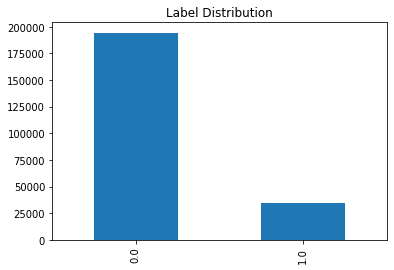

In [20]:
diabetes_dataset['Diabetes_binary'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

In [21]:
class_0 = diabetes_dataset[diabetes_dataset['Diabetes_binary'] == 0]
class_1 = diabetes_dataset[diabetes_dataset['Diabetes_binary'] == 1]

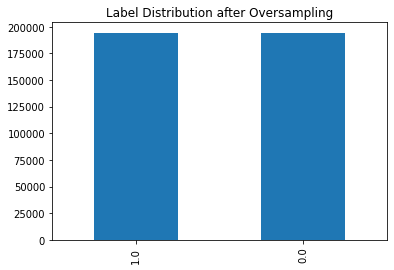

In [22]:
class_1_over = class_1.sample(len(class_0), replace=True)
df_new = pd.concat([class_1_over, class_0], axis=0)
df_new['Diabetes_binary'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [23]:
df_new['Diabetes_binary'].value_counts()

1.0    194377
0.0    194377
Name: Diabetes_binary, dtype: int64

In [24]:
X = df_new.drop(columns = 'Diabetes_binary', axis=1)
Y = df_new['Diabetes_binary']

In [25]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

In [26]:
print(X)
print(Y)

[[-1.16622276  0.93361507  0.16513715 ...  0.48053582  0.11459692
  -0.27925723]
 [-1.16622276 -1.07110524  0.16513715 ...  1.17491887  0.11459692
  -0.27925723]
 [ 0.85746912  0.93361507  0.16513715 ...  0.82772735  0.11459692
   0.64160172]
 ...
 [ 0.85746912  0.93361507  0.16513715 ... -1.25542182  1.08758073
   0.64160172]
 [-1.16622276 -1.07110524  0.16513715 ... -2.29699641  0.11459692
  -1.66054564]
 [ 0.85746912 -1.07110524  0.16513715 ... -0.56103877  0.11459692
  -2.12097512]]
125659    1.0
79745     1.0
237025    1.0
251929    1.0
199976    1.0
         ... 
253673    0.0
253674    0.0
253675    0.0
253677    0.0
253678    0.0
Name: Diabetes_binary, Length: 388754, dtype: float64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',min_samples_split=10, random_state=0)

# fitting the model on the train data
model_1.fit(X_train, y_train)

# predicting values on test data
predictions = model_1.predict(X_test)
accuracies = {}

In [30]:
a1=accuracy_score(y_test,predictions)
print(a1)
accuracies['Random Forest Classifier'] = a1

0.9034224640197553


In [31]:
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
44600,1.0,1.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
17663,1.0,1.0
203264,1.0,1.0
187797,1.0,1.0


In [32]:
classificationreport = classification_report(y_test, predictions) 
print(classificationreport)

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     38705
         1.0       0.86      0.96      0.91     39046

    accuracy                           0.90     77751
   macro avg       0.91      0.90      0.90     77751
weighted avg       0.91      0.90      0.90     77751



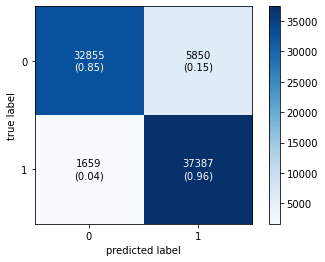

In [33]:
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Logistic Regression

In [34]:
model2 = LogisticRegression()
model2.fit(X_train, y_train) #Training the model
predictions2 = model2.predict(X_test)
print(predictions)# printing predictions

[0. 1. 0. ... 1. 1. 0.]


In [35]:
a2=accuracy_score(y_test, predictions2)
print(a2)
accuracies['Logistic Regression'] = a2

0.7319005543337063


In [36]:
mat=confusion_matrix(y_test,predictions2)
print(mat)

[[27488 11217]
 [ 9628 29418]]


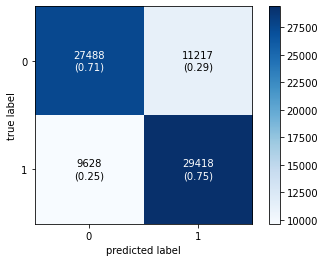

In [37]:
plot_confusion_matrix(conf_mat=mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [38]:
classificationreport2 = classification_report(y_test, predictions2) 
print(classificationreport2)

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73     38705
         1.0       0.72      0.75      0.74     39046

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751



# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
predictions3 = gnb.predict(X_test)
a3=accuracy_score(y_test, predictions3)
print(a3)
accuracies['Naive Bayes'] = a3

0.7062545819346375


In [41]:
mat2=confusion_matrix(y_test,predictions3)
print(mat2)

[[26402 12303]
 [10536 28510]]


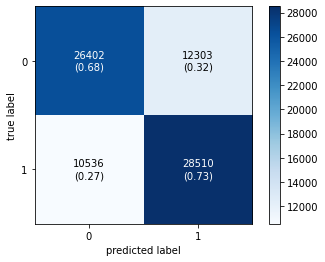

In [42]:
plot_confusion_matrix(conf_mat=mat2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [43]:
classificationreport2 = classification_report(y_test, predictions3) 
print(classificationreport2)

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     38705
         1.0       0.70      0.73      0.71     39046

    accuracy                           0.71     77751
   macro avg       0.71      0.71      0.71     77751
weighted avg       0.71      0.71      0.71     77751



In [44]:
input_data = [1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = model_1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1.]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



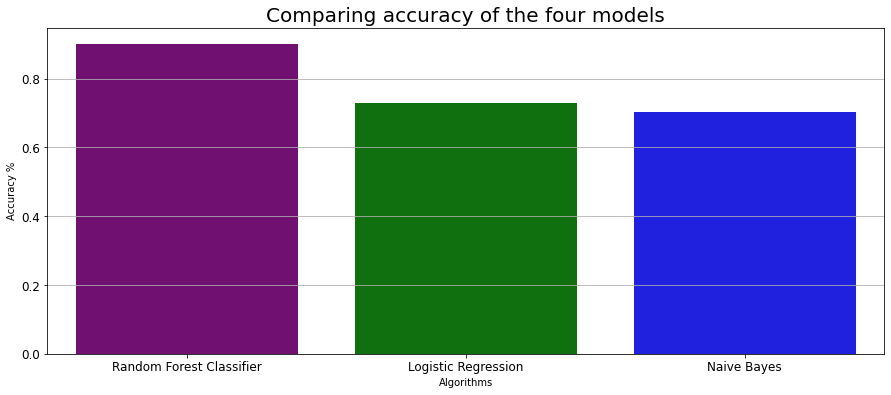

In [45]:
colors = ["purple", "green", "blue"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [46]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,Random Forest Classifier,0.903422
1,Logistic Regression,0.731901
2,Naive Bayes,0.706255
